In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorboard
from keras.callbacks import Callback, TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_image='D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Train'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 10554 images belonging to 14 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Test',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 2470 images belonging to 14 classes.


In [5]:
#Mobilenet
mobileNet = "https://tfhub.dev/google/imagenet/mobilenet_v2_050_224/classification/5"

In [6]:
# model 
model = Sequential([
    #layer input
    hub.KerasLayer(mobileNet, input_shape=(224, 224, 3), trainable=False),
    #layer output
    Dense(14, activation="softmax")]
)

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1988505   
                                                                 
 dense (Dense)               (None, 14)                14028     
                                                                 
Total params: 2,002,533
Trainable params: 14,028
Non-trainable params: 1,988,505
_________________________________________________________________


In [8]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [9]:
batch_size=1024
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=8,
                    callbacks=[early])

Epoch 1/8
20/20 [==============================] - 555s 28s/step - loss: 1.4904 - accuracy: 0.5485 - auc: 0.9055 - precision: 0.6880 - recall: 0.4405 - true_positives: 4423.0000 - val_loss: 0.6080 - val_accuracy: 0.7803 - val_auc: 0.9845 - val_precision: 0.8328 - val_recall: 0.7417 - val_true_positives: 1519.0000
Epoch 2/8
20/20 [==============================] - 331s 17s/step - loss: 0.4006 - accuracy: 0.8464 - auc: 0.9936 - precision: 0.8750 - recall: 0.8153 - true_positives: 8187.0000 - val_loss: 0.4401 - val_accuracy: 0.8350 - val_auc: 0.9906 - val_precision: 0.8673 - val_recall: 0.8140 - val_true_positives: 1667.0000
Epoch 3/8
20/20 [==============================] - 309s 16s/step - loss: 0.3144 - accuracy: 0.8775 - auc: 0.9959 - precision: 0.8963 - recall: 0.8537 - true_positives: 8573.0000 - val_loss: 0.3743 - val_accuracy: 0.8657 - val_auc: 0.9926 - val_precision: 0.8903 - val_recall: 0.8438 - val_true_positives: 1728.0000
Epoch 4/8
20/20 [==============================] - 299s

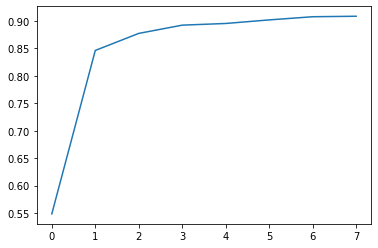

In [10]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()